In [413]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
import seaborn as sns
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

In [414]:
retail = pd.read_csv('OnlineRetail.csv' , encoding = 'ISO-8859-1')

In [415]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**feature list**
- InvoiceNo : 주문번호
- StockCode : 상품코드
- Description : 상품설명
- Quantity : 주문수량
- InvoiceDate : 주문날짜
- UnitPrice : 상품가격
- CustomerID : 고객아이디
- Country : 나라

In [416]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [417]:
retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [418]:
retail.dropna(inplace = True)

In [419]:
retail = retail[retail['Quantity'] > 0]

In [420]:
retail = retail[retail['UnitPrice'] > 0]

In [421]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [422]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [423]:
retail['Price'] = retail['Quantity'] * retail['UnitPrice']

In [424]:
retail.drop(['Quantity','UnitPrice'] , axis = 1 , inplace = True)

In [425]:
retail

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,01-12-2010 08:26,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,09-12-2011 12:50,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,09-12-2011 12:50,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,09-12-2011 12:50,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,09-12-2011 12:50,12680.0,France,16.60


In [426]:
retail = retail[retail['Country'] == 'United Kingdom']

In [427]:
from datetime import datetime
retail.InvoiceDate = retail.InvoiceDate.apply(lambda x : datetime.strptime(x, '%d-%m-%Y %H:%M'))
retail['year'] = retail.InvoiceDate.apply(lambda x : x.year)
retail['month'] = retail.InvoiceDate.apply(lambda x : x.month)
retail['day'] = retail.InvoiceDate.apply(lambda x : x.day)
retail['hour'] = retail.InvoiceDate.apply(lambda x: x.hour)

In [428]:
retail.drop('InvoiceDate' , inplace = True , axis = 1)

In [429]:
retail.head()

,InvoiceNo,StockCode,Description,CustomerID,Country,Price,year,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34,2010,12,1,8


In [430]:
a = retail.groupby(['CustomerID','year','month','day'])['Price'].sum()

In [431]:
a = pd.DataFrame(a)

In [432]:
total = a.reset_index()

In [433]:
total['count'] = 1

In [434]:
visit = pd.DataFrame(total.groupby('CustomerID')['count'].sum()).reset_index()

In [435]:
visit

,CustomerID,count
0,12346.0,1
1,12747.0,11
2,12748.0,113
3,12749.0,4
4,12820.0,4
...,...,...
3915,18280.0,1
3916,18281.0,1
3917,18282.0,2
3918,18283.0,14


In [436]:
top20 = visit.sort_values(by = 'count' , ascending = False).head(20)

In [437]:
aa = visit.sort_values(by = 'count' , ascending = False)['count'].value_counts()

In [438]:
aa.values

array([1398,  784,  460,  351,  206,  169,  115,   80,   58,   40,   37,
         36,   27,   22,   21,   18,   15,   11,    9,    6,    5,    5,
          5,    5,    4,    3,    3,    3,    2,    2,    2,    2,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [439]:
aa

1      1398
2       784
3       460
4       351
5       206
6       169
7       115
8        80
9        58
10       40
11       37
12       36
13       27
15       22
17       21
14       18
20       15
18       11
16        9
21        6
23        5
19        5
26        5
25        5
29        4
24        3
28        3
35        3
22        2
32        2
33        2
38        2
48        1
90        1
89        1
71        1
66        1
54        1
53        1
39        1
42        1
41        1
112       1
36        1
31        1
30        1
27        1
113       1
Name: count, dtype: int64

In [440]:
aa.keys()

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
             15,  17,  14,  20,  18,  16,  21,  23,  19,  26,  25,  29,  24,
             28,  35,  22,  32,  33,  38,  48,  90,  89,  71,  66,  54,  53,
             39,  42,  41, 112,  36,  31,  30,  27, 113],
           dtype='int64')

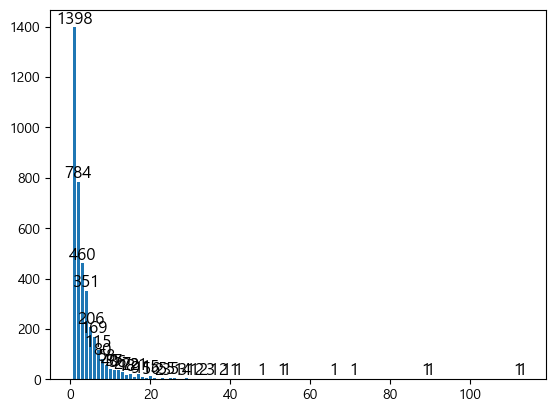

In [441]:
bar = plt.bar(x = aa.keys() , height = aa.values)


for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2.0,height,  height, ha = 'center',va='bottom',size=12)

In [442]:
total = pd.merge(visit , pd.DataFrame(total.groupby('CustomerID')['Price'].sum()).reset_index() , on = 'CustomerID')

In [443]:
total2 = total[['count','Price']]

In [444]:
total2['Price'] = np.log1p(total2['Price'])

In [445]:
from sklearn.cluster import KMeans

In [446]:
model = KMeans(n_clusters = 4 , init = 'k-means++' , max_iter = 300 , random_state = 0)
model.fit(total2)

KMeans(n_clusters=4, random_state=0)

In [447]:
model.labels_

array([3, 0, 1, ..., 3, 0, 3])

In [448]:
total2['grade'] = model.labels_

In [449]:
total2['CustomerID'] = total['CustomerID']

In [450]:
total2

,count,Price,grade,CustomerID
0,1,11.253955,3,12346.0
1,11,8.342128,0,12747.0
2,113,10.425868,1,12748.0
3,4,8.316760,3,12749.0
4,4,6.849427,3,12820.0
...,...,...,...,...
3915,1,5.201806,3,18280.0
3916,1,4.404522,3,18281.0
3917,2,5.187665,3,18282.0
3918,14,7.647729,0,18283.0


In [451]:
total2['Price'] = np.exp(total2['Price']-1)

In [452]:
total2[total2['grade'] == 0].sort_values(by = 'Price')

,count,Price,grade,CustomerID
3737,6,26.126798,0,18037.0
2754,6,113.203862,0,16668.0
1615,6,117.905361,0,15107.0
2639,5,147.836032,0,16500.0
2228,5,149.204544,0,15938.0
...,...,...,...,...
1268,7,6095.946280,0,14607.0
2511,13,9795.820184,0,16333.0
187,9,10425.107398,0,13081.0
82,12,15471.890942,0,12931.0


In [453]:
total2[total2['grade'] == 1].sort_values(by = 'Price')

,count,Price,grade,CustomerID
110,71,4116.905717,1,12971.0
1267,89,4472.549488,1,14606.0
2,113,12405.163308,1,12748.0
3593,112,15080.323744,1,17841.0
191,66,21641.181346,1,13089.0
1771,90,22355.628973,1,15311.0


In [454]:
total2[total2['grade'] == 2].sort_values(by = 'Price')

,count,Price,grade,CustomerID
3684,35,477.301502,2,17961.0
987,16,737.958801,2,14217.0
3889,17,763.015070,2,18241.0
1237,20,823.597457,2,14560.0
1744,15,922.667390,2,15271.0
...,...,...,...,...
2766,16,24520.842284,2,16684.0
2294,39,29807.740740,2,16029.0
3356,28,33500.345346,2,17511.0
3314,27,71571.603784,2,17450.0


mapping = {0: '일반고객', 1: '우수고객', 2: '최우수고객'}
total2['grade'] = total2['grade'].map(mapping)

In [470]:
total2[total2['grade'] == 0].sort_values(by = 'Price')

,grade,CustomerID,count,Price,실루엣계수
3737,0,18037.0,6,26.126798,-0.761721
2754,0,16668.0,6,113.203862,-0.795422
1615,0,15107.0,6,117.905361,-0.795837
2639,0,16500.0,5,147.836032,-0.794779
2228,0,15938.0,5,149.204544,-0.794588
...,...,...,...,...,...
1268,0,14607.0,7,6095.946280,0.071851
2511,0,16333.0,13,9795.820184,-0.171154
187,0,13081.0,9,10425.107398,-0.249137
82,0,12931.0,12,15471.890942,-0.548756


In [471]:
total2[total2['grade'] == 1].sort_values(by = 'Price')

,grade,CustomerID,count,Price,실루엣계수
110,1,12971.0,71,4116.905717,-0.720909
1267,1,14606.0,89,4472.549488,-0.681387
2,1,12748.0,113,12405.163308,0.225730
3593,1,17841.0,112,15080.323744,0.367027
191,1,13089.0,66,21641.181346,0.418234
1771,1,15311.0,90,22355.628973,0.407330


In [474]:
total2[total2['grade'] == 2].sort_values(by = 'Price')

,grade,CustomerID,count,Price,실루엣계수
3684,2,17961.0,35,477.301502,-0.939488
987,2,14217.0,16,737.958801,-0.898140
3889,2,18241.0,17,763.015070,-0.895183
1237,2,14560.0,20,823.597457,-0.894986
1744,2,15271.0,15,922.667390,-0.892696
...,...,...,...,...,...
2766,2,16684.0,16,24520.842284,-0.450861
2294,2,16029.0,39,29807.740740,-0.350912
3356,2,17511.0,28,33500.345346,-0.303009
3314,2,17450.0,27,71571.603784,-0.119601


In [473]:
total2[total2['grade'] == 3].sort_values(by = 'Price')

,grade,CustomerID,count,Price,실루엣계수
2807,3,16738.0,1,1.747427,0.745570
1398,3,14792.0,1,2.648732,0.746162
2604,3,16454.0,2,2.906248,0.746328
3680,3,17956.0,1,5.058342,0.747746
2913,3,16878.0,1,5.260676,0.747880
...,...,...,...,...,...
2270,3,16000.0,1,4559.755309,-0.188434
1607,3,15098.0,1,14684.827593,-0.560254
2094,3,15749.0,2,16383.621276,-0.579670
0,3,12346.0,1,28394.627515,-0.465106


In [458]:
total2.columns

Index(['count', 'Price', 'grade', 'CustomerID'], dtype='object')

In [459]:
total2 = total2[['grade','CustomerID','count','Price']]

In [460]:
total2

,grade,CustomerID,count,Price
0,3,12346.0,1,28394.627515
1,0,12747.0,11,1543.993693
2,1,12748.0,113,12405.163308
3,3,12749.0,4,1505.318528
4,3,12820.0,4,347.035392
...,...,...,...,...
3915,3,18280.0,1,66.806907
3916,3,18281.0,1,30.099896
3917,3,18282.0,2,65.868814
3918,0,18283.0,14,771.031163


In [461]:
from sklearn.metrics import silhouette_samples , silhouette_score

In [462]:
score_samples = silhouette_samples(total2[['Price','count']] , total2['grade'])

In [463]:
total2['실루엣계수'] = score_samples

In [464]:
total2['실루엣계수'].mean()

0.49247495886261694

In [465]:
total2.loc[total2['grade'] == 0 , '실루엣계수'].mean()

-0.015924309500076703

In [466]:
total2.loc[total2['grade'] == 1 , '실루엣계수'].mean()

0.0026709390335624603

In [467]:
total2.loc[total2['grade'] == 2 , '실루엣계수'].mean()

-0.5223268404267045

In [468]:
total2.loc[total2['grade'] == 3 , '실루엣계수'].mean()

0.6722820017405416